In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [70]:
df= pd.read_csv('train.csv')[['Age','Fare','Survived']]

In [71]:
df.sample(5)

,Age,Fare,Survived
806,39.0,0.00,0
83,28.0,47.10,0
225,22.0,9.35,0
276,45.0,7.75,0
874,28.0,24.00,1


In [72]:
df.isnull().mean()*100

Age         19.86532
Fare         0.00000
Survived     0.00000
dtype: float64

In [73]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=2)

In [74]:
X_train.isnull().sum()

Age     148
Fare      0
dtype: int64

In [75]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [76]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:

In [77]:
X_train.sample(10)

,Age,Fare,Age_imputed
73,26.0,14.4542,26.0
240,NaN,14.4542,3.0
645,48.0,76.7292,48.0
218,32.0,76.2917,32.0
513,54.0,59.4000,54.0
266,16.0,39.6875,16.0
685,25.0,41.5792,25.0
788,1.0,20.5750,1.0
798,30.0,7.2292,30.0
174,56.0,30.6958,56.0


In [78]:
X_train.isnull().sum()

Age            148
Fare             0
Age_imputed      0
dtype: int64

C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\1340219045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label ='original',hist=False)
C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\1340219045.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

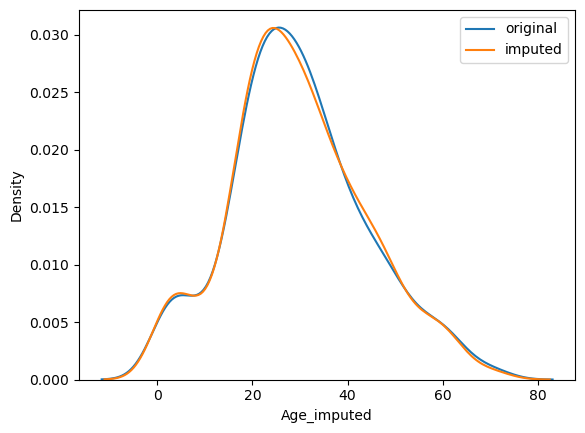

In [79]:
sns.distplot(X_train['Age'],label ='original',hist=False)
sns.distplot(X_train['Age_imputed'],label ='imputed',hist=False)
plt.legend()
plt.show()

In [80]:
print('original variable variance : ',X_train['Age'].var())
print('imputed variable variance : ',X_train['Age_imputed'].var())

original variable variance :  204.3495133904614
imputed variable variance :  202.90726578940087


In [81]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.953750
Age,71.512440,204.349513,204.349513
Age_imputed,53.953750,204.349513,202.907266


<Axes: >

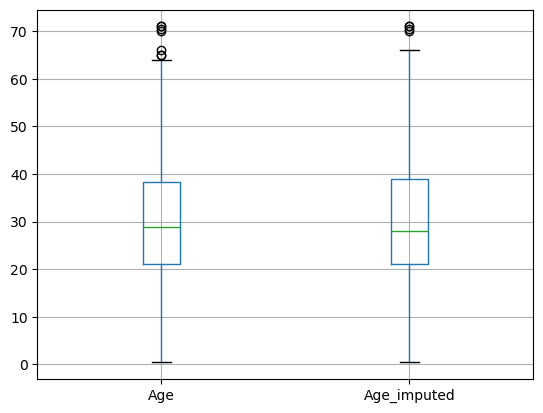

In [82]:
X_train[['Age','Age_imputed']].boxplot()

In [83]:
sampled_value =X_train['Age'].sample(1,random_state=int(['Fare']))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [84]:
data=pd.read_csv('housing_data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [85]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [86]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [87]:
X=data
y=data['SalePrice']

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.2,random_state=2)

In [89]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']



In [90]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
631,Gd,TA,209500,TA,Gd
1172,NaN,TA,171900,TA,NaN
85,TA,TA,260000,TA,TA
172,TA,Gd,239000,Gd,TA
322,TA,TA,301000,TA,TA


In [91]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [92]:
temp=pd.concat([
    (X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna())),
    (X_train['GarageQual_imputed'].value_counts()/len(X_train))],axis=1)
temp.columns=['original','imputed']

In [93]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [94]:
temp1=pd.concat([
    (X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna())),
    (X_train['FireplaceQu_imputed'].value_counts()/len(X_train))],axis=1)
temp1.columns=['original','imputed']

In [95]:
temp1

,original,imputed
Gd,0.494272,0.494007
TA,0.412439,0.410959
Fa,0.040917,0.041952
Po,0.027823,0.029110
Ex,0.024550,0.023973


C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\1806683033.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\1806683033.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your cod

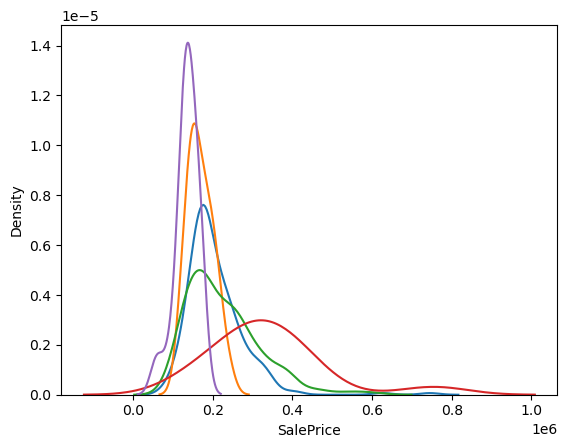

In [97]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.show()    

C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\784182600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iitia\AppData\Local\Temp\ipykernel_7164\784182600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt yo

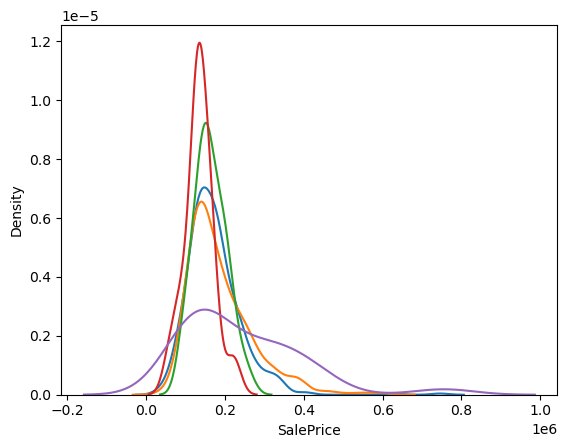

In [98]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show() 